In [45]:
#Instalação


# Problema da Máxima Interseção de $k$-Subconjuntos




O Problema da Máxima Interseção de $k$-Subconjuntos (**KMIS**) pode ser definido como: Dado uma coleção $\mathcal{S}$ de subconjuntos do conjunto finito $B$ e um inteiro $k$, deseja-se selecionar $k$ subconjuntos $S_1, S_2, \ldots, S_k \in \mathcal{S}$, tal que  $|S_1 \cap \ldots \cap S_k|$ seja máximo.


O problema pode ser modelado com um grafo bipartido $G=(L \cup R, E)$, sendo que cada vértice $u \in L$ está associado a um subconjunto $S_u \in \mathcal{S}$ e cada vértice $v \in R$ está associado a um elemento $b_v \in B$. Existe uma aresta entre um vértice $u$ (associado a um subconjunto $S_u \in \mathcal{S}$) e um vértice $v$ (relacionado a um elemento $b_v \in B$), se e somente se, $b_v \in S_u$. Portanto, queremos determinar $L' \subset L$, com $|L'| = k$, de forma que $|\cap(L')|$ seja máximo, onde $\cap(L') = \bigcap_{u \in L'} N_G(u)$, com $N_G(u)$ sendo a vizinhança de $u$ em $G$. Por simplicidade, iremos cometer o seguinte abuso de notação: algumas vezes iremos nos referir aos vértices de $L$ pelos subconjuntos $S_u \in \mathcal{S}$ e mesmo denomina-los de vértices ou de subconjuntos.


Vejamos um exemplo, seja $B = \{1,2, 3, 4, 5\}$, $\mathcal{S}=\{S_1,S_2,S_3\}$, onde $S_1 = \{2, 3, 4\}$, $S_2 = \{1, 4, 5\}$ e $S_3 = \{1, 2, 3, 4\}$. Para $k = 2$, o problema consiste em selecionar a máxima interseção entre todos os pares de subconjuntos. A Figura abaixo ilustra esse exemplo. Note que $|S_1 \cap S_2| = 1, |S_1 \cap S_3| = 3$ e $|S_2 \cap S_3| = 2$. Portanto, a solução ótima para essa instância é dada por $L'= \{S_1,S_3\}$. Observe que o subgrafo induzido pelos vértices $ S_1 $ e $ S_3 $ e todos os vértices associados com os elementos em $S_1 \cap S_3$ definem um grafo bipartido completo.

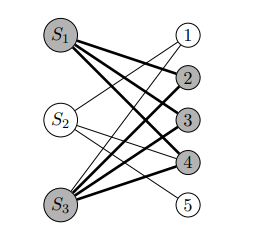

# Modelagem

Variáveis de decisão:
* y_i =
  \begin{cases}
  1, \text{se $S_i$ foi escolhido}\\
  0, \text{caso contrário}\\
  \end{cases}
  

* x_i =
  \begin{cases}
  1, \text{se $e_i$ foi escolhido}\\
  0, \text{caso contrário}\\
  \end{cases}


**Modelagem PLI**


\begin{align*}
\max & \quad z = \sum_{i=0}^{|B|-1} x_i\\
\text{subject to}: &\\
                   & \sum_{j \in L} y_j = k\\
                   & x_i + y_j \leq 1 & \forall j \in L, \forall i, e_i \not \in S_j\\
                   & y_i \in \{0,1\} & \forall i \in L\\
                   & x_i \in \{0,1\} & \forall i \in R\\
\end{align*}   



In [46]:
n = 3
m = 5
L = [0,1,2]
R = [1,2,3,4,5]
S = [[2,3,4], [1,4,5], [1,2,3,4] ]
k = 2

In [47]:
#Importando
from ortools.linear_solver import pywraplp

In [48]:
#Instanciando o solver
solver = pywraplp.Solver.CreateSolver('SCIP')

In [49]:
#Criando as variáveis de decisão
y = []
for i in range(n):
  y.append(solver.IntVar(0.0, 1.0, 'y{}'.format(i)))

x = []
for i in range(m):
  x.append( solver.IntVar(0.0, 1.0, 'x{}'.format(i)) )

In [50]:
#Função Objetiva
'''
c = 0
for i in range(m):
  c += x[i]
solver.Maximize(c)
'''
solver.Maximize(solver.Sum(x[i] for i in range(m)))

In [51]:
#Restrições
'''
c = 0
for i in range(n):
  c += y[i]
solver.Add(c == k)
'''
solver.Add(solver.Sum(y[i] for i in range(n)) == k, 'R1')

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x7cb972b2f5a0> >

In [52]:
for j in range(n):
    for i in range(m):
        if R[i] not in S[j]:
            solver.Add(y[j] + x[i] <= 1, 'R2_{}_{}'.format(j, i))

In [53]:
print(solver.ExportModelAsLpFormat(False))

\ Generated by MPModelProtoExporter
\   Name             : 
\   Format           : Free
\   Constraints      : 6
\   Variables        : 8
\     Binary         : 8
\     Integer        : 0
\     Continuous     : 0
Maximize
 Obj: +1 x0 +1 x1 +1 x2 +1 x3 +1 x4 
Subject to
 R1: +1 y0 +1 y1 +1 y2  = 2
 R2_0_0: +1 y0 +1 x0  <= 1
 R2_0_4: +1 y0 +1 x4  <= 1
 R2_1_1: +1 y1 +1 x1  <= 1
 R2_1_2: +1 y1 +1 x2  <= 1
 R2_2_4: +1 y2 +1 x4  <= 1
Bounds
 0 <= y0 <= 1
 0 <= y1 <= 1
 0 <= y2 <= 1
 0 <= x0 <= 1
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1
 0 <= x4 <= 1
Binaries
 y0
 y1
 y2
 x0
 x1
 x2
 x3
 x4
End



In [54]:
#Resolvendo
status = solver.Solve()

In [55]:
'''Status da Solução
pywraplp.Solver.OPTIMAL: Encontrou a solução ótima
pywraplp.Solver.FEASIBLE: Encontrou uma solução viável sem garantia da otimalidade da solução
pywraplp.Solver.INFEASIBLE: A instância é inviável
'''

if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())

    for i in range(n):
      print("y{} = {}".format(i, y[i].solution_value()) )

    for i in range(m):
      print("x{} = {}".format(i, x[i].solution_value()) )

else:
    print('The problem does not have an optimal solution.')

Solution:
Objective value = 3.0
y0 = 1.0
y1 = 0.0
y2 = 1.0
x0 = 0.0
x1 = 1.0
x2 = 1.0
x3 = 1.0
x4 = -0.0


In [56]:
print('\nAdvanced usage:')
print('Problem solved in %f milliseconds' % solver.wall_time())
print('Problem solved in %d iterations' % solver.iterations())
print('Problem solved in %d branch-and-bound nodes' % solver.nodes())


Advanced usage:
Problem solved in 113.000000 milliseconds
Problem solved in 0 iterations
Problem solved in 0 branch-and-bound nodes


# Coloração de Grafos

Dado um grafo $G = (V,E)$, encontre uma rotulação dos vértices $c: V \to \mathbb{N}$ de maneira que dois vértices adjacentes não recebam o mesmo rótulo. Os rótulos são chamados de cores. Na Figura abaixo, temos o grafo de petersen com uma coloração com três cores para um grafo com 10 vértices e 15 arestas.

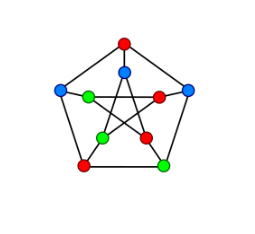

# Modelagem da coloração

**Variáveis de decisão:**
* x_j =
  \begin{cases}
  1, \text{se a cor $j$ será usada}\\
  0, \text{caso contrário}\\
  \end{cases}

* y_{vj} =
  \begin{cases}
  1, \text{se a cor $j$ foi atribuída para o vértice v}\\
  0, \text{caso contrário}\\
  \end{cases}

**Restrições**:

* Restrição de atribuição

$$\sum_{j=1}^{n} y_{vj} = 1 \quad \forall v \in \{0,1,\ldots,n-1\}$$

* Restrição das arestas

$$y_{v,j} + y_{u,j} \leq x_j \quad \forall j \in \{1,2,\ldots, n\}, \forall \{u,v\} \in E$$

* Restrição de cores

$$y_{v,j} \leq x_j \forall v \in \{0,1,\ldots, n-1\}, j \in \{0,1,\ldots,n-1\}$$

* Restrição para usar as primeiras cores

$$x_{j} \geq x_{j+1} \forall j \in \{0,1, \ldots, n-2\}$$


* Restrição de domínio

$$x_j \in \{0,1\} \quad \forall j \in \{0,1,\ldots,n-1\}$$

$$y_{v,j} \in \{0,1\} \quad \forall v \in \{0,1,\ldots, n-1\}, j \in \{1,2,\ldots, n\}$$




**Modelagem PLI**


\begin{align*}
\min & \quad z = \sum_{i=0}^{n} x_i\\
\text{subject to}: &\\
                   & \sum_{j=1}^{n} y_{vj} = 1 &\quad \forall v \in V\\
                   &y_{v,j} + y_{u,j} \leq x_j &\quad \forall j \in \{1,2,\ldots, n\}, \forall \{u,v\} \in E\\
                   & x_{j} \geq x_{j+1} & \forall j \in \{1, \ldots, n-2\}\\
                   & y_{v,j} \leq x_j & \forall v \in \{0,1,\ldots, n-1\}, j \in \{0,1,\ldots,n-1\}\\
                   & x_j \in \{0,1\} & \quad \forall v \in V\\
                   &y_{v,j} \in \{0,1\} & \quad \forall v \in V, j \in \{1,2,\ldots, n\}   
\end{align*}   



In [57]:
#Biblioteca de geração de Grafos: https://networkx.org/
%pip install networkx
%pip install matplotlib
import networkx as nx
G = nx.petersen_graph()
print(G.nodes())
print(G.edges())
nx.draw(G)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/jrg/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/jrg/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/jrg/.local/lib/python3.10/site-packages/ipy

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

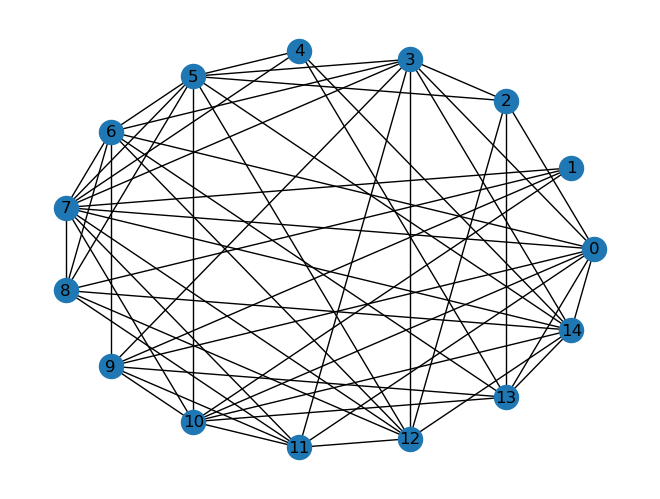

In [ ]:
G = nx.gnp_random_graph(15, 0.5)
nx.draw_circular(G, with_labels=True)

Solution:
Objective value = 3.0
x0 = 1.0
x1 = 1.0
x2 = 1.0
x3 = 0.0
x4 = 0.0
x5 = 0.0
x6 = 0.0
x7 = 0.0
x8 = 0.0
x9 = 0.0
vertice 0 recebeu cor 0
vertice 1 recebeu cor 1
vertice 2 recebeu cor 0
vertice 3 recebeu cor 1
vertice 4 recebeu cor 2
vertice 5 recebeu cor 1
vertice 6 recebeu cor 0
vertice 7 recebeu cor 2
vertice 8 recebeu cor 2
vertice 9 recebeu cor 1

Advanced usage:
Problem solved in 24.000000 milliseconds
Problem solved in 17 iterations
Problem solved in 1 branch-and-bound nodes


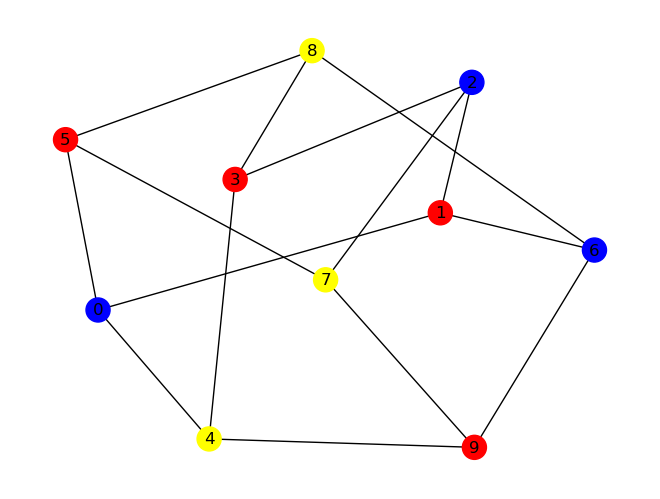

In [ ]:
G = nx.petersen_graph()
n = len(G.nodes())

solver = pywraplp.Solver.CreateSolver('SCIP')

# variáveis das cores
x = []
for j in range(n):
  x.append(solver.IntVar(0.0, 1.0, 'x{}'.format(j)) )

y = {}
for v in range(n):
  for j in range(n):
    y[v,j]  = solver.IntVar(0.0, 1.0, 'y{}'.format((v,j)))

#Função Objetiva
solver.Minimize(solver.Sum(x[i] for i in range(n)))

# Restrições
for v in range(n):
  solver.Add(solver.Sum(y[v,i] for i in range(n)) == 1)


for i in range(n-1):
  solver.Add(x[i] >= x[i+1])

for j in range(n):
  for (u,v) in G.edges():
    solver.Add(y[v,j] + y[u,j] <= x[j])

status = solver.Solve()

color = ["blue","red","yellow"]

if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())

    for i in range(n):
      print("x{} = {}".format(i, x[i].solution_value()) )

    color_map = []
    for v in range(n):
      for i in range(n):
        if y[v,i].solution_value() == 1:
          print("vertice {} recebeu cor {}".format(v,i) )
          color_map.append( color[i] )
else:
    print('The problem does not have an optimal solution.')

print('\nAdvanced usage:')
print('Problem solved in %f milliseconds' % solver.wall_time())
print('Problem solved in %d iterations' % solver.iterations())
print('Problem solved in %d branch-and-bound nodes' % solver.nodes())


nx.draw(G, node_color=color_map, with_labels=True)    

Solution:
Objective value = 5.0
x0 = 1.0
x1 = 1.0
x2 = 1.0
x3 = 1.0
x4 = 1.0
x5 = 0.0
x6 = 0.0
x7 = 0.0
x8 = 0.0
x9 = 0.0
x10 = 0.0
x11 = 0.0
x12 = 0.0
x13 = 0.0
x14 = 0.0
vertice 0 recebeu cor 0
vertice 1 recebeu cor 0
vertice 2 recebeu cor 1
vertice 3 recebeu cor 2
vertice 4 recebeu cor 0
vertice 5 recebeu cor 2
vertice 6 recebeu cor 3
vertice 7 recebeu cor 0
vertice 8 recebeu cor 1
vertice 9 recebeu cor 2
vertice 10 recebeu cor 0
vertice 11 recebeu cor 1
vertice 12 recebeu cor 4
vertice 13 recebeu cor 3
vertice 14 recebeu cor 4

Advanced usage:
Problem solved in 68.000000 milliseconds
Problem solved in 45 iterations
Problem solved in 1 branch-and-bound nodes


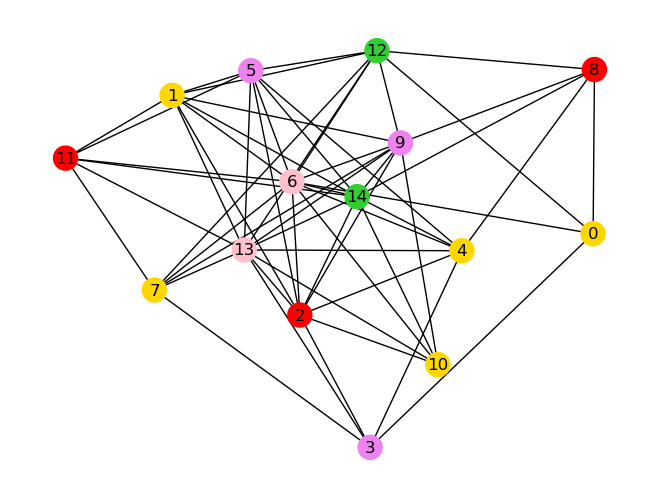

In [ ]:
G = nx.gnp_random_graph(15, 0.5)
n = len(G.nodes())

solver = pywraplp.Solver.CreateSolver('SCIP')
# variáveis das cores
x = []
for j in range(n):
  x.append(solver.IntVar(0.0, 1.0, 'x{}'.format(j)) )

y = {}
for v in range(n):
  for j in range(n):
    y[v,j]  = solver.IntVar(0.0, 1.0, 'y{}'.format((v,j)))

#Função Objetiva
solver.Minimize(solver.Sum(x[i] for i in range(n)))

# Restrições
for v in range(n):
  solver.Add(solver.Sum(y[v,i] for i in range(n)) == 1)


for i in range(n-1):
  solver.Add(x[i] >= x[i+1])

for j in range(n):
  for (u,v) in G.edges():
    solver.Add(y[v,j] + y[u,j] <= x[j])

status = solver.Solve()

color = ["gold", "red", "violet", "pink", "limegreen","violet", "darkorange"]

if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())


    for i in range(n):
      print("x{} = {}".format(i, x[i].solution_value()) )

    color_map = []
    for v in range(n):
      for i in range(n):
        if y[v,i].solution_value() == 1:
          print("vertice {} recebeu cor {}".format(v,i) )
          color_map.append( color[i] )
else:
    print('The problem does not have an optimal solution.')

print('\nAdvanced usage:')
print('Problem solved in %f milliseconds' % solver.wall_time())
print('Problem solved in %d iterations' % solver.iterations())
print('Problem solved in %d branch-and-bound nodes' % solver.nodes())

nx.draw(G, node_color=color_map, with_labels=True)